## Importa bibliotecas iniciais

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Configurações visualização notebook

In [2]:
# Configurações Visualizaçao Jupiter
d_Config = {'max_columns': 1000,
            #'expand_frame_repr': True,
            #'max_rows': 30,
            'precision': 4,
            'show_dimensions': True}

for op, value in d_Config.items():
    pd.set_option("display.{}".format(op), value)

## Leitura das bases de dados

In [3]:
# lê base de treino 2008
base = pd.read_csv('base_para_ml_cod_2008.csv', index_col=0)
# filtra o dataset apenas com os registros de candidaturas do município de São Paulo
train_df = base.query('SG_UE == 71072').copy()
train_df.drop(columns='SG_UE', inplace=True)

In [5]:
# lê base teste 2012
test_df  = pd.read_csv('base_para_ml_cod_2012.csv', index_col=0)
test_df.drop(columns='SG_UE', inplace=True)

In [6]:
train_df.sample(3)

,NR_PARTIDO,CD_OCUPACAO,IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,TP_AGREMIACAO,COMP_COLIGACAO,QT_PART_COL,QT_BENS,VL_TOT_BENS,REC_PROP,REC_PF,REC_PJ,REC_PARTCAND,REC_OUTRAS,VR_DESPESA,VOTOS_PART_ELEC_ANT,QT_ELEITOS_ELEC_ANT,RESULTADO
SQ_CANDIDATO,,,,,,,,,,,,,,,,,,,,,,,
12877,23,923,63,4,6,9,2,35,71072,0,0,1,6,53400.0,0.0,0.0,0.0,1020.8,0.0,1020.8,244373,2,0
4803,50,999,27,2,5,3,1,35,70572,1,1302,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
12544,12,257,45,2,8,3,1,35,71072,0,0,1,3,9400.0,0.0,120.0,300.0,14858.0,0.0,15278.0,194484,2,0


In [7]:
test_df.sample(3)

,NR_PARTIDO,CD_OCUPACAO,IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,TP_AGREMIACAO,COMP_COLIGACAO,QT_PART_COL,QT_BENS,VL_TOT_BENS,REC_PROP,REC_PF,REC_PJ,REC_PARTCAND,REC_OUTRAS,VR_DESPESA,VOTOS_PART_ELEC_ANT,QT_ELEITOS_ELEC_ANT,RESULTADO
SQ_CANDIDATO,,,,,,,,,,,,,,,,,,,,,,,
250000002232,43,131,45,4,8,9,1,35,71072,0,0,1,0,0.0,0.0,0.0,0.0,4521.20,0.0,4521.20,329117,3,0
250000007513,65,142,37,2,8,9,1,35,71072,0,0,1,0,0.0,0.0,0.0,0.0,28142.06,0.0,11132.06,159153,2,0
250000017618,12,131,54,4,8,3,1,29,35157,0,0,1,4,143700.0,0.0,0.0,1200.0,12817.04,0.0,18293.00,143901,1,0


In [8]:
def resumo_dados(train, test):
    colunas = train.shape[1] 
    treino = train.shape[0]
    teste = test.shape[0]
    tot_obs = treino + teste
    print(f'*** Resumo das bases de treinamento e teste ***')
    print(f'{tot_obs} observações totais na amostra')
    print(f'{round(treino/tot_obs,2)}% ({treino}) na amostra de treinamento')
    print(f'{round(teste/tot_obs,2)}% ({teste}) na amostra de teste')
    print(f'{colunas} colunas no total, sendo uma target')
    print(f'{colunas - 1} colunas preditoras')
    print(f'{int(treino / (colunas - 1))} observações por coluna preditora')

In [9]:
resumo_dados(train_df, test_df)

*** Resumo das bases de treinamento e teste ***
2435 observações totais na amostra
0.44% (1060) na amostra de treinamento
0.56% (1375) na amostra de teste
23 colunas no total, sendo uma target
22 colunas preditoras
48 observações por coluna preditora


In [10]:
def resumo_base_treino(train,alvo):
    n_predi = train.shape[1] -1 
    observ = train.shape[0]
    a0,a1 = alvo.value_counts()
    print(f'*** Resumo Amostra de treinamento ***')
    print(f'{observ} observações na amostra de treinamento')
    print(f'{n_predi} colunas preditoras')
    print(f'{int(observ / n_predi)} observações por coluna preditora')
    print(f'{round(a0/(a0+a1),2)} : {round(a1/(a0+a1),2)} - balanceamento da coluna target')

In [11]:
resumo_base_treino(train_df, train_df.RESULTADO)

*** Resumo Amostra de treinamento ***
1060 observações na amostra de treinamento
22 colunas preditoras
48 observações por coluna preditora
0.95 : 0.05 - balanceamento da coluna target


In [12]:
# criando copia da base de treino para trabalharmos
basett = train_df.copy()
df_teste = test_df.copy()

In [13]:
corr_matriz = basett.corr()
corr_matriz

,NR_PARTIDO,CD_OCUPACAO,IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_NACIONALIDADE,CD_MUNICIPIO_NASCIMENTO,TP_AGREMIACAO,COMP_COLIGACAO,QT_PART_COL,QT_BENS,VL_TOT_BENS,REC_PROP,REC_PF,REC_PJ,REC_PARTCAND,REC_OUTRAS,VR_DESPESA,VOTOS_PART_ELEC_ANT,QT_ELEITOS_ELEC_ANT,RESULTADO
NR_PARTIDO,1.0000,-0.0230,-0.0262,0.0207,-0.0046,0.0220,-0.1424,0.0377,0.3557,0.4216,0.1647,0.0590,0.0869,0.0210,0.0317,-0.0055,-0.0563,0.0409,-0.0159,-0.0378,-0.0026,0.0098
CD_OCUPACAO,-0.0230,1.0000,0.0165,0.0631,-0.3358,-0.0424,0.0982,-0.0416,-0.0882,-0.0815,-0.0887,-0.1858,-0.0486,-0.0843,-0.0882,-0.0855,-0.0663,-0.0301,-0.0970,-0.0732,-0.0631,-0.0817
IDADE_DATA_POSSE,-0.0262,0.0165,1.0000,0.0694,-0.0309,0.2649,-0.0442,-0.0324,-0.0173,-0.0506,0.0016,0.2272,0.0665,0.0699,0.0115,0.0239,0.0393,-0.0058,0.0386,0.0090,0.0089,0.0875
CD_GENERO,0.0207,0.0631,0.0694,1.0000,0.0650,0.0899,0.0928,0.0447,0.0273,0.0253,0.0517,-0.1080,-0.0321,-0.0809,-0.0753,-0.0639,-0.0741,-0.0433,-0.0927,-0.0195,-0.0154,-0.0782
CD_GRAU_INSTRUCAO,-0.0046,-0.3358,-0.0309,0.0650,1.0000,0.0523,-0.0415,0.1580,0.0649,0.0960,0.0984,0.2498,0.0708,0.1092,0.1424,0.1237,0.0987,0.0478,0.1466,0.1593,0.1590,0.0990
CD_ESTADO_CIVIL,0.0220,-0.0424,0.2649,0.0899,0.0523,1.0000,-0.0291,0.0157,0.0054,-0.0050,0.0211,0.0297,-0.0050,0.0280,-0.0002,-0.0263,0.0202,-0.0131,0.0042,0.0441,0.0441,-0.0156
CD_NACIONALIDADE,-0.1424,0.0982,-0.0442,0.0928,-0.0415,-0.0291,1.0000,-0.0470,-0.2536,-0.2384,-0.2151,-0.0712,-0.0219,-0.0589,-0.0719,-0.0618,-0.0777,-0.0165,-0.0859,-0.2176,-0.2002,-0.0691
CD_MUNICIPIO_NASCIMENTO,0.0377,-0.0416,-0.0324,0.0447,0.1580,0.0157,-0.0470,1.0000,0.0617,0.0487,-0.0116,0.0316,0.0183,0.0240,0.0551,0.0417,0.0167,0.0106,0.0369,0.0501,0.0728,0.0306
TP_AGREMIACAO,0.3557,-0.0882,-0.0173,0.0273,0.0649,0.0054,-0.2536,0.0617,1.0000,0.9413,0.8301,0.0541,0.0447,0.0864,0.2113,0.1579,0.1877,0.0669,0.2098,0.2836,0.2655,0.1641
COMP_COLIGACAO,0.4216,-0.0815,-0.0506,0.0253,0.0960,-0.0050,-0.2384,0.0487,0.9413,1.0000,0.8314,0.0519,0.0403,0.0642,0.2268,0.1675,0.2012,0.0754,0.2203,0.4212,0.4011,0.1770


<AxesSubplot:>

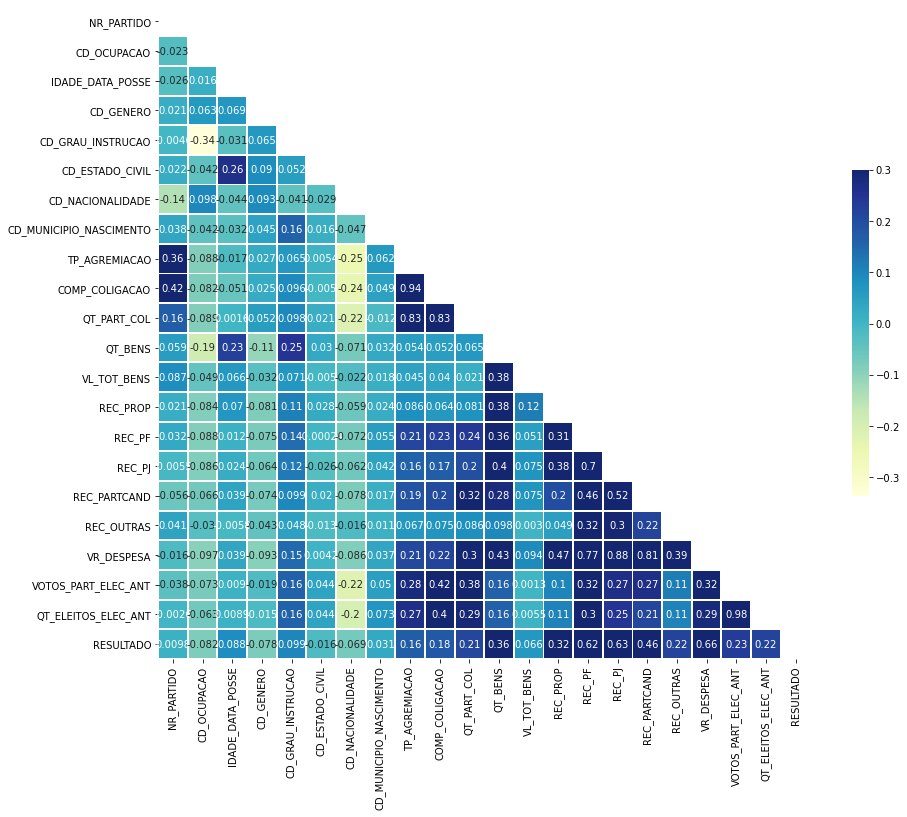

In [86]:
#sns.heatmap(basett.corr(), annot=True, cmap="YlGnBu")
#plt.show()

import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt

d = basett

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap="YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .5}, annot=True)

In [14]:
# importando ferramentas/ modelos de classificação
from pycaret.classification import *

In [54]:
clf = setup(data = basett,
            target = 'RESULTADO', 
            numeric_features = ['IDADE_DATA_POSSE','QT_PART_COL','QT_BENS','VL_TOT_BENS','VR_DESPESA',
                                'REC_PROP','REC_PF','REC_PJ','REC_PARTCAND','REC_OUTRAS',
                                'VOTOS_PART_ELEC_ANT','QT_ELEITOS_ELEC_ANT'],

            categorical_features = ['NR_PARTIDO', 'CD_OCUPACAO', 'CD_GENERO', 'CD_GRAU_INSTRUCAO', 
                                    'CD_ESTADO_CIVIL', 'CD_NACIONALIDADE', 'SG_UF_NASCIMENTO', 
                                    'CD_MUNICIPIO_NASCIMENTO', 'TP_AGREMIACAO','COMP_COLIGACAO'], 
            
            normalize = True, 
            #normalize_method = 'zscore',
            ignore_low_variance = True,
            remove_multicollinearity = True,  
            multicollinearity_threshold = 0.95,
            session_id = 1234,
            feature_selection = True,
            feature_selection_threshold= 0.7,
            silent = False,
            log_experiment = True, experiment_name = 'ensaios_predicao_vereador')

,Description,Value
0,session_id,1234
1,Target,RESULTADO
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1060, 23)"
5,Missing Values,False
6,Numeric Features,12
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [55]:
# compara modelos, tendo como parâmetro a métrica F1
best_model = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9717,0.9797,0.6500,0.8333,0.7159,0.7015,0.7150,0.1860
catboost,CatBoost Classifier,0.9703,0.9850,0.6750,0.7950,0.7095,0.6943,0.7077,0.8070
gbc,Gradient Boosting Classifier,0.9703,0.9843,0.6750,0.7983,0.7087,0.6939,0.7084,0.0410
xgboost,Extreme Gradient Boosting,0.9703,0.9854,0.6500,0.7883,0.6813,0.6667,0.6851,0.0560
ridge,Ridge Classifier,0.9703,0.0000,0.6167,0.8317,0.6729,0.6587,0.6839,0.0060
et,Extra Trees Classifier,0.9703,0.9773,0.5917,0.8333,0.6686,0.6542,0.6756,0.1790
lightgbm,Light Gradient Boosting Machine,0.9690,0.9839,0.6250,0.8150,0.6670,0.6520,0.6782,0.0180
ada,Ada Boost Classifier,0.9663,0.9813,0.5917,0.7850,0.6431,0.6268,0.6489,0.0250
lda,Linear Discriminant Analysis,0.9649,0.9479,0.6167,0.7588,0.6401,0.6229,0.6465,0.0070
dt,Decision Tree Classifier,0.9595,0.7976,0.6167,0.7461,0.6219,0.6029,0.6323,0.0060


### Criação dos modelos
- Na criação, são usados hiperparâmetros padrão no treinamento do modelo

In [16]:
# cria modelo Random Forest com parâmetros padrão
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9733,0.9683,0.5000,1.0000,0.6667,0.6544,0.6974
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9865,0.9929,0.7500,1.0000,0.8571,0.8502,0.8599
3,0.9595,0.9857,0.5000,0.6667,0.5714,0.5506,0.5569
4,0.9595,0.9661,0.7500,0.6000,0.6667,0.6454,0.6499
5,0.9324,0.9518,0.5000,0.4000,0.4444,0.4089,0.4118
6,0.9865,0.9964,0.7500,1.0000,0.8571,0.8502,0.8599
7,0.9730,0.9571,0.5000,1.0000,0.6667,0.6542,0.6972
8,0.9865,1.0000,0.7500,1.0000,0.8571,0.8502,0.8599
9,0.9595,0.9786,0.5000,0.6667,0.5714,0.5506,0.5569


In [17]:
# cria modelo Catboost com parâmetros padrão
catb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9733,0.9718,0.5000,1.0000,0.6667,0.6544,0.6974
1,0.9865,1.0000,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9865,1.0000,0.7500,1.0000,0.8571,0.8502,0.8599
3,0.9595,0.9893,0.7500,0.6000,0.6667,0.6454,0.6499
4,0.9595,0.9750,0.7500,0.6000,0.6667,0.6454,0.6499
5,0.9459,0.9571,0.5000,0.5000,0.5000,0.4714,0.4714
6,0.9865,0.9964,0.7500,1.0000,0.8571,0.8502,0.8599
7,0.9730,0.9821,0.5000,1.0000,0.6667,0.6542,0.6972
8,0.9865,1.0000,0.7500,1.0000,0.8571,0.8502,0.8599
9,0.9459,0.9786,0.5000,0.5000,0.5000,0.4714,0.4714


In [18]:
# cria modelo XGboost com parâmetros padrão
xg = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9733,0.9859,0.5000,1.0000,0.6667,0.6544,0.6974
1,0.9865,1.0000,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9730,0.9929,0.7500,0.7500,0.7500,0.7357,0.7357
3,0.9865,0.9929,1.0000,0.8000,0.8889,0.8818,0.8880
4,0.9595,0.9750,0.5000,0.6667,0.5714,0.5506,0.5569
5,0.9459,0.9500,0.5000,0.5000,0.5000,0.4714,0.4714
6,0.9730,0.9964,0.7500,0.7500,0.7500,0.7357,0.7357
7,0.9595,0.9929,0.2500,1.0000,0.4000,0.3867,0.4896
8,0.9865,0.9893,0.7500,1.0000,0.8571,0.8502,0.8599
9,0.9595,0.9786,0.5000,0.6667,0.5714,0.5506,0.5569


In [19]:
# cria modelo Decision Tree com parâmetros padrão
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.6250,0.2500,1.0000,0.4000,0.3869,0.4898
1,0.9865,0.8333,0.6667,1.0000,0.8000,0.7933,0.8108
2,0.9730,0.7500,0.5000,1.0000,0.6667,0.6542,0.6972
3,0.9865,0.9929,1.0000,0.8000,0.8889,0.8818,0.8880
4,0.9459,0.8536,0.7500,0.5000,0.6000,0.5723,0.5858
5,0.9054,0.7143,0.5000,0.2857,0.3636,0.3166,0.3311
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9459,0.6179,0.2500,0.5000,0.3333,0.3084,0.3287
8,0.9730,0.7500,0.5000,1.0000,0.6667,0.6542,0.6972
9,0.9189,0.8393,0.7500,0.3750,0.5000,0.4612,0.4941


In [20]:
# cria modelo Logistic Regression com parâmetros padrão
rl = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.8803,0.2500,1.0000,0.4000,0.3869,0.4898
1,0.9730,0.9859,0.6667,0.6667,0.6667,0.6526,0.6526
2,0.9730,1.0000,0.5000,1.0000,0.6667,0.6542,0.6972
3,0.9595,0.9786,0.5000,0.6667,0.5714,0.5506,0.5569
4,0.9595,0.9857,0.7500,0.6000,0.6667,0.6454,0.6499
5,0.9459,0.8536,0.5000,0.5000,0.5000,0.4714,0.4714
6,0.9595,1.0000,0.2500,1.0000,0.4000,0.3867,0.4896
7,0.9730,0.8857,0.5000,1.0000,0.6667,0.6542,0.6972
8,0.9730,0.9464,0.7500,0.7500,0.7500,0.7357,0.7357
9,0.9595,0.9750,0.5000,0.6667,0.5714,0.5506,0.5569


### Melhorando (tunning) os modelos
- automaticamente ajusta os hiperparâmetros do modelo usando Random Grid Search em uma "tabela pré definida
- saída mostra tabela de scores com Accuracy, AUC, Recall, Precision, F1, Kappa e MCC por fold p/ melhor modelo
- é possível customizar a "tabela de busca do grid search
- por padrão otimiza para Acurácia. pode ser definido outra métrica

In [23]:
# Tunning Random Forest 
tuned_rf = tune_model(rf, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.9683,0.5000,0.4000,0.4444,0.4094,0.4123
1,0.9595,1.0000,1.0000,0.5000,0.6667,0.6476,0.6920
2,0.9324,0.9893,1.0000,0.4444,0.6154,0.5843,0.6424
3,0.9054,1.0000,1.0000,0.3636,0.5333,0.4932,0.5721
4,0.9459,0.9893,1.0000,0.5000,0.6667,0.6408,0.6866
5,0.9054,0.9500,1.0000,0.3636,0.5333,0.4932,0.5721
6,0.9054,0.9857,1.0000,0.3636,0.5333,0.4932,0.5721
7,0.9459,0.9929,1.0000,0.5000,0.6667,0.6408,0.6866
8,0.9189,1.0000,1.0000,0.4000,0.5714,0.5356,0.6047
9,0.9189,1.0000,1.0000,0.4000,0.5714,0.5356,0.6047


In [24]:
# Tunning Random Forest 
tuned_rf2 = tune_model(rf, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.9789,0.5000,0.6667,0.5714,0.5509,0.5572
1,0.9865,1.0000,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9865,0.9964,1.0000,0.8000,0.8889,0.8818,0.8880
3,0.9595,0.9964,1.0000,0.5714,0.7273,0.7071,0.7396
4,0.9595,0.9821,1.0000,0.5714,0.7273,0.7071,0.7396
5,0.9054,0.9536,0.5000,0.2857,0.3636,0.3166,0.3311
6,0.9595,0.9964,1.0000,0.5714,0.7273,0.7071,0.7396
7,0.9865,0.9857,0.7500,1.0000,0.8571,0.8502,0.8599
8,0.9459,0.9929,1.0000,0.5000,0.6667,0.6408,0.6866
9,0.9730,1.0000,1.0000,0.6667,0.8000,0.7861,0.8047


In [28]:
# Tunning Catboost 
tuned_catb = tune_model(catb, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9733,0.9718,0.5000,1.0000,0.6667,0.6544,0.6974
1,0.9865,0.9953,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9865,1.0000,0.7500,1.0000,0.8571,0.8502,0.8599
3,0.9730,0.9821,0.7500,0.7500,0.7500,0.7357,0.7357
4,0.9595,0.9750,0.7500,0.6000,0.6667,0.6454,0.6499
5,0.9189,0.9607,0.5000,0.3333,0.4000,0.3584,0.3669
6,0.9730,0.9964,0.7500,0.7500,0.7500,0.7357,0.7357
7,0.9730,0.9857,0.5000,1.0000,0.6667,0.6542,0.6972
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9595,0.9821,0.7500,0.6000,0.6667,0.6454,0.6499


In [29]:
# Tunning XGboost 
tuned_xg = tune_model(xg, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.9859,0.7500,0.6000,0.6667,0.6457,0.6502
1,0.9595,0.9906,1.0000,0.5000,0.6667,0.6476,0.6920
2,0.9324,1.0000,1.0000,0.4444,0.6154,0.5843,0.6424
3,0.8919,0.9964,1.0000,0.3333,0.5000,0.4559,0.5434
4,0.9595,0.9893,1.0000,0.5714,0.7273,0.7071,0.7396
5,0.9189,0.9464,1.0000,0.4000,0.5714,0.5356,0.6047
6,0.9459,0.9821,1.0000,0.5000,0.6667,0.6408,0.6866
7,0.9324,0.9714,0.7500,0.4286,0.5455,0.5119,0.5353
8,0.9189,0.9786,0.7500,0.3750,0.5000,0.4612,0.4941
9,0.9324,0.9964,1.0000,0.4444,0.6154,0.5843,0.6424


In [30]:
# Tunning Decision Tree 
tuned_dt = tune_model(dt, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.7430,0.5000,0.6667,0.5714,0.5509,0.5572
1,0.9865,0.9930,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9730,0.9857,1.0000,0.6667,0.8000,0.7861,0.8047
3,0.9865,0.9929,1.0000,0.8000,0.8889,0.8818,0.8880
4,0.9459,0.8536,0.7500,0.5000,0.6000,0.5723,0.5858
5,0.9324,0.8464,0.7500,0.4286,0.5455,0.5119,0.5353
6,0.9595,0.9786,1.0000,0.5714,0.7273,0.7071,0.7396
7,0.9730,0.8679,0.7500,0.7500,0.7500,0.7357,0.7357
8,0.9730,0.9857,1.0000,0.6667,0.8000,0.7861,0.8047
9,0.9324,0.9643,1.0000,0.4444,0.6154,0.5843,0.6424


In [31]:
# Tunning Logistic Regression para melhor "F1"
tuned_rl = tune_model(rl, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9733,0.7289,0.5000,1.0000,0.6667,0.6544,0.6974
1,0.9730,0.9859,1.0000,0.6000,0.7500,0.7367,0.7636
2,0.9459,0.9964,1.0000,0.5000,0.6667,0.6408,0.6866
3,0.9595,0.9750,0.7500,0.6000,0.6667,0.6454,0.6499
4,0.9324,0.9786,1.0000,0.4444,0.6154,0.5843,0.6424
5,0.9459,0.8179,0.7500,0.5000,0.6000,0.5723,0.5858
6,0.9730,0.9821,1.0000,0.6667,0.8000,0.7861,0.8047
7,0.9595,0.7750,0.5000,0.6667,0.5714,0.5506,0.5569
8,0.9459,0.9393,0.7500,0.5000,0.6000,0.5723,0.5858
9,0.9459,0.9821,0.7500,0.5000,0.6000,0.5723,0.5858


### Resultados e gráficos

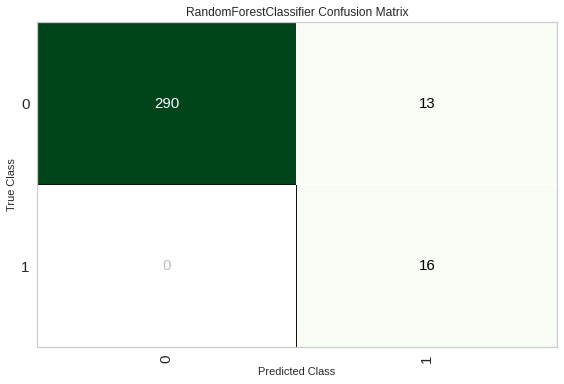

In [27]:
# Matriz de confusão do modelo Random Forest
plot_model(tuned_rf, plot = 'confusion_matrix')

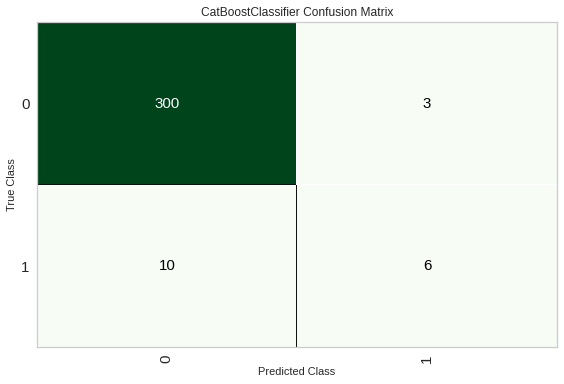

In [32]:
# Matriz de confusão do modelo Catboost
plot_model(tuned_catb, plot = 'confusion_matrix')

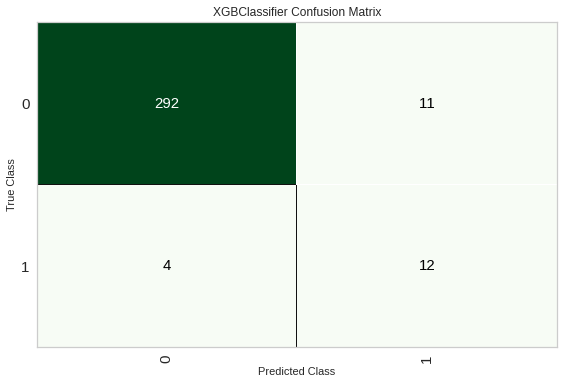

In [33]:
# Matriz de confusão do modelo XGBoost
plot_model(tuned_xg, plot = 'confusion_matrix')

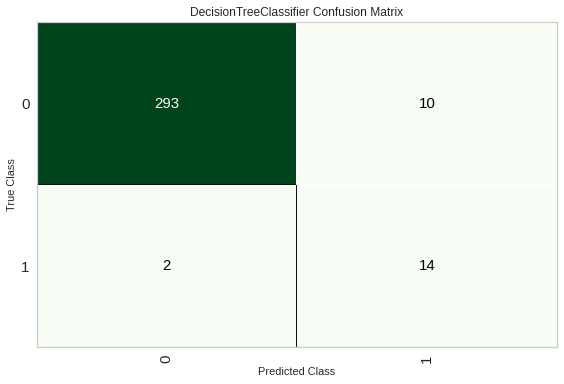

In [34]:
# Matriz de confusão do modelo Decision Tree
plot_model(tuned_dt, plot = 'confusion_matrix')

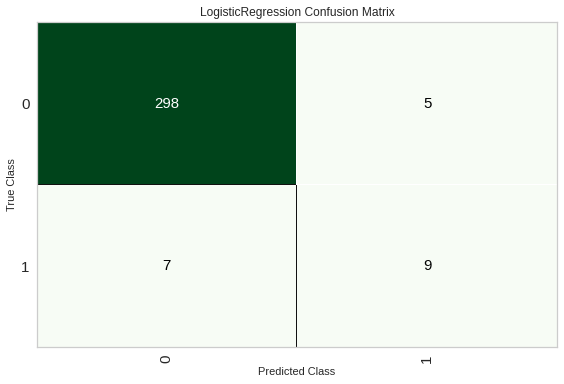

In [35]:
# Matriz de confusão do modelo Logistic Regression
plot_model(tuned_rl, plot = 'confusion_matrix')

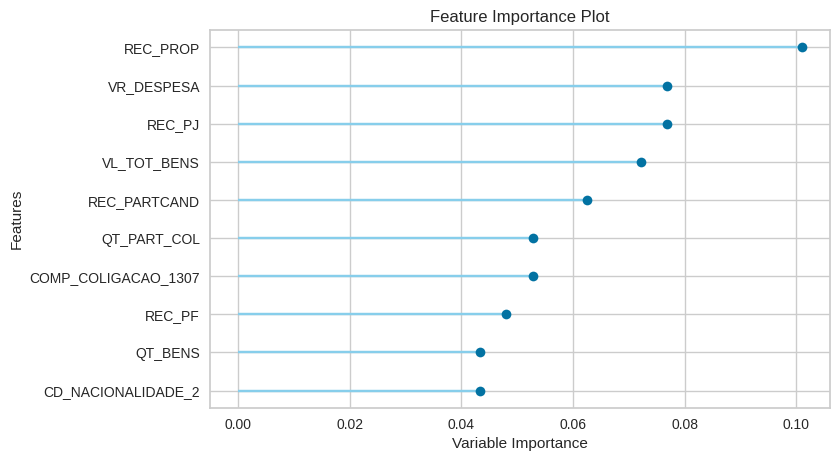

In [36]:
# Importancia das preditoras: Random Forest
plot_model(tuned_rf, plot = 'feature')

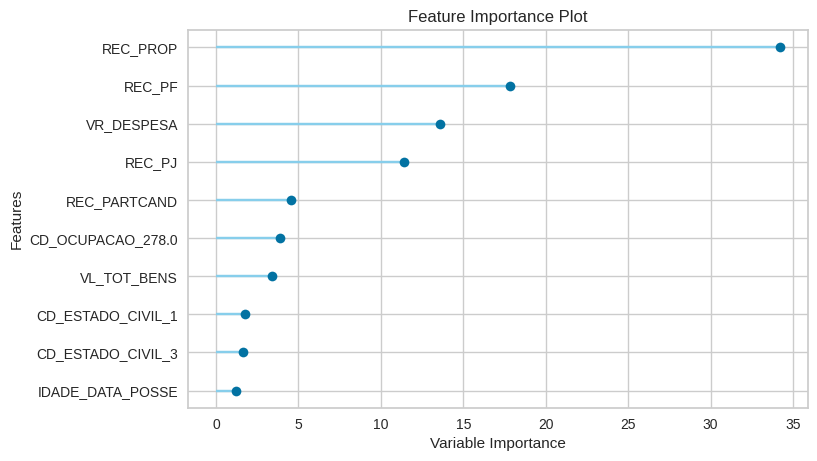

In [37]:
# Importancia das preditoras: Catboost
plot_model(tuned_catb, plot = 'feature')

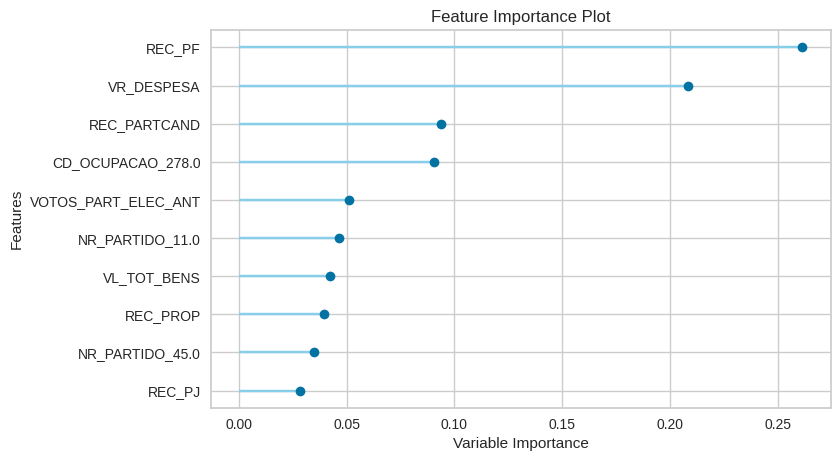

In [38]:
# Importancia das preditoras: XGBoost
plot_model(tuned_xg, plot = 'feature')

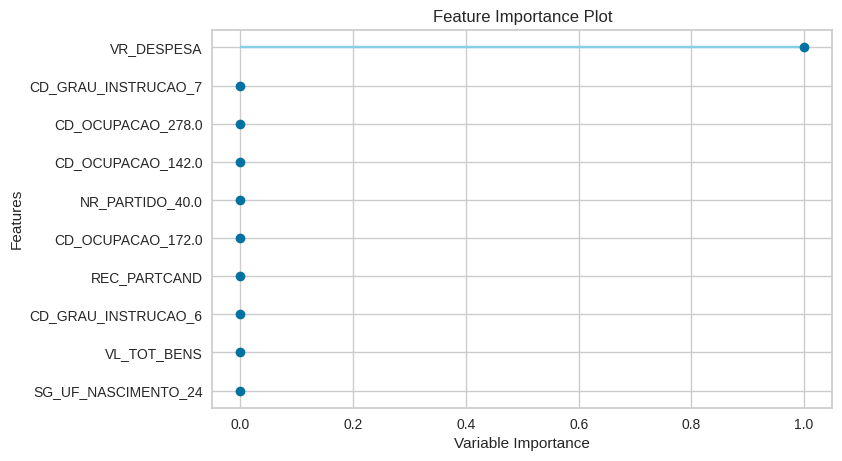

In [39]:
# Importancia das preditoras: Decision Tree
plot_model(tuned_dt, plot = 'feature')

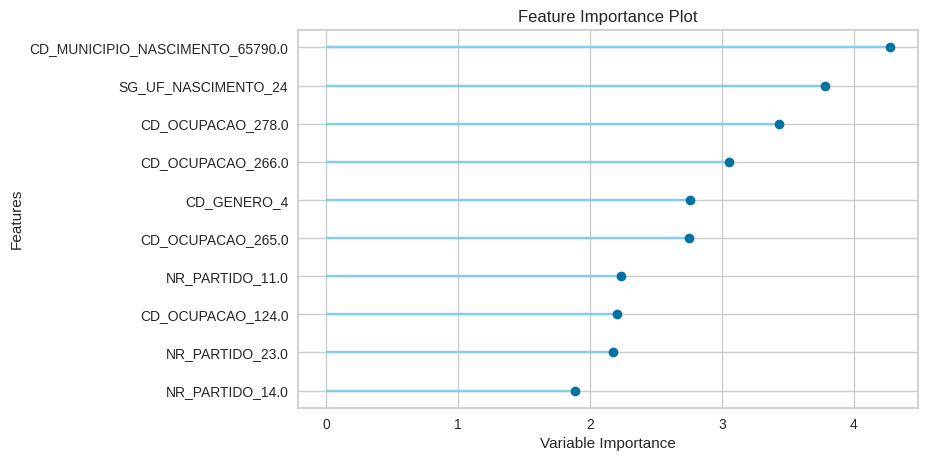

In [40]:
# Importancia das preditoras: Logistic Regression
plot_model(tuned_rl, plot = 'feature')

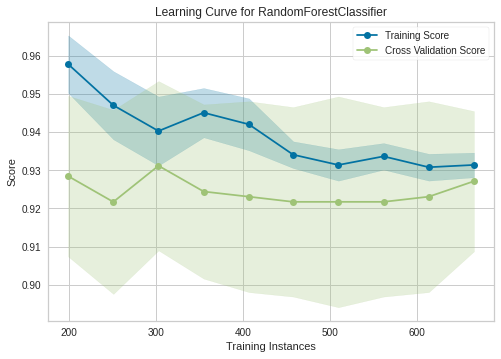

In [44]:
plot_model(tuned_rf, plot = 'learning')

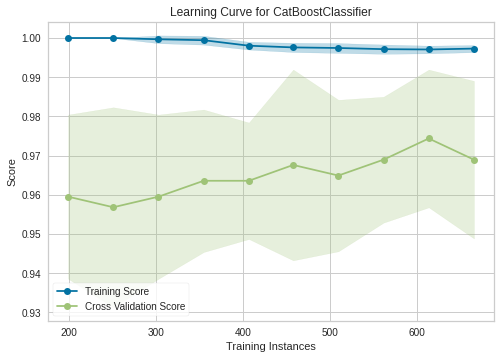

In [41]:
plot_model(tuned_catb, plot = 'learning')

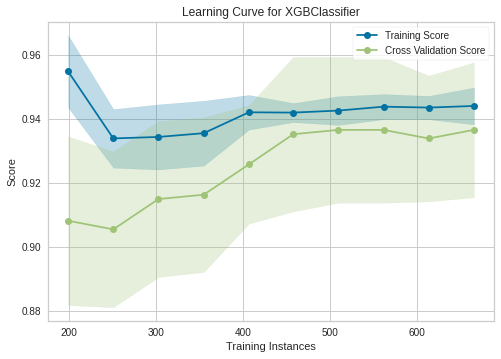

In [43]:
plot_model(tuned_xg, plot = 'learning')

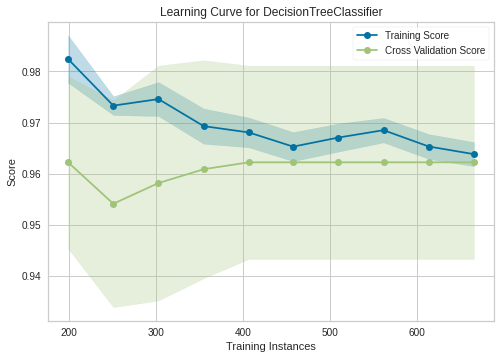

In [42]:
plot_model(tuned_dt, plot = 'learning')

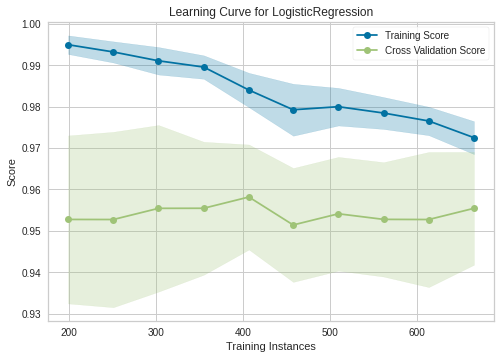

In [45]:
plot_model(tuned_rl, plot = 'learning')

### Realiza predições nos 30% de teste

In [46]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9592,0.9821,1.0000,0.5517,0.7111,0.6911,0.7267


In [47]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(tuned_catb);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9592,0.9862,0.3750,0.6667,0.4800,0.4605,0.4813


In [48]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(tuned_xg);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9530,0.9831,0.7500,0.5217,0.6154,0.5912,0.6023


In [49]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(tuned_dt);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9624,0.9210,0.8750,0.5833,0.7000,0.6808,0.6967


In [50]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(tuned_rl);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9624,0.9249,0.5625,0.6429,0.6000,0.5804,0.5818


### Realizando "ensamble" dos 4 melhores modelos, por votação (blending/voting)

In [56]:
# Ensemble (blend) dos 4 melhores modelos "individuais" que haviamnos criado
estimadores = [tuned_dt, tuned_xg, tuned_rf, tuned_rl]
blend_4s = blend_models(estimator_list = estimadores, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.9754,0.5000,0.6667,0.5714,0.5509,0.5572
1,0.9865,1.0000,1.0000,0.7500,0.8571,0.8502,0.8599
2,0.9730,1.0000,1.0000,0.6667,0.8000,0.7861,0.8047
3,0.9730,0.9929,1.0000,0.6667,0.8000,0.7861,0.8047
4,0.9324,0.9857,0.7500,0.4286,0.5455,0.5119,0.5353
5,0.9189,0.9679,0.5000,0.3333,0.4000,0.3584,0.3669
6,0.9730,0.9929,1.0000,0.6667,0.8000,0.7861,0.8047
7,0.9595,0.9786,0.5000,0.6667,0.5714,0.5506,0.5569
8,0.9595,0.9893,0.7500,0.6000,0.6667,0.6454,0.6499
9,0.9595,0.9929,1.0000,0.5714,0.7273,0.7071,0.7396


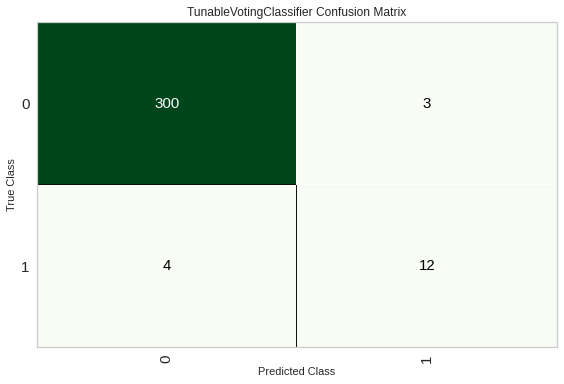

In [57]:
# matriz de decisão do modelo "emsamble" que criamos
plot_model(blend_4s, plot = 'confusion_matrix')

In [58]:
# Realiza predições na amostra de testes (30% da amostra total)
predict_model(blend_4s);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9781,0.9851,0.7500,0.8000,0.7742,0.7627,0.7631


### Finaliza o modelo e salva pipiline para uso com dados desconhecidos

In [62]:
# finaliza os 4 melhores modelos e o ensamble
rf_final = finalize_model(tuned_rf)
xg_final = finalize_model(tuned_xg)
dt_final = finalize_model(tuned_dt)
rl_final = finalize_model(tuned_rl)
blend4s_final = finalize_model(blend_4s)

In [65]:
# Salva a pipiline dos modelos para uso futuro
save_model(rf_final,'rf_final')
save_model(xg_final,'xg_final')
save_model(dt_final,'dt_final')
save_model(rl_final,'rl_final')
save_model(catb_final,'catb_final')
save_model(blend4s_final,'blend4s_final');

Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved
Transformation Pipeline and Model Succesfully Saved


In [ ]:
# Faz Leitura dos modelos salvos

In [15]:
rf_final = load_model('rf_final')
xg_final = load_model('xg_final')
dt_final = load_model('dt_final')
rl_final = load_model('rl_final')
blend3s_final = load_model('blend3s_final')
blend4s_final = load_model('blend4s_final')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


### Realiza predições com os dados de candidaturas do ano 2012 (desconhecidos dos modelos)

In [16]:
# realiza as predições, a partir dos modelos finais, para os dados de 2012
pred12_rf = predict_model(rf_final, data=test_df)
pred12_xg = predict_model(xg_final, data=test_df)
pred12_dt = predict_model(dt_final, data=test_df)
pred12_rl = predict_model(rl_final, data=test_df)
pred12_b4s = predict_model(blend4s_final, data=test_df)

In [18]:
from pycaret.utils import check_metric

def metricas(lista_modelos,lista_metricas):
    # calcula métrica "acurácia" do modelo
    for mod in lista_modelos:
        pred = 'pred12' + mod
        for met in lista_metricas:
            res = check_metric(pred['RESULTADO'], pred['Label'], metric = met)
            print(f'modelo: {mod}, métrica: {met}: {res}')

In [19]:
dici = {'rf':pred12_rf, 'xg':pred12_xg, 'dt':pred12_dt, 'rl':pred12_rl,
        'b3s':pred12_b3s,'b4s':pred12_b4s}
lmet = ['F1','Recall', 'Precision', 'Accuracy']

for key, value in dici.items():
    for met in lmet:
        res = check_metric(value['RESULTADO'], value['Label'], metric = met)
        print (key,met,res)
        
        #print(f'modelo: {key}, métrica: {met}: {res}');

rf F1 0.5934
rf Recall 0.8852
rf Precision 0.4463
rf Accuracy 0.9462
xg F1 0.6456
xg Recall 0.8361
xg Precision 0.5258
xg Accuracy 0.9593
dt F1 0.6667
dt Recall 0.8033
dt Precision 0.5698
dt Accuracy 0.9644
rl F1 0.5753
rl Recall 0.6885
rl Precision 0.4941
rl Accuracy 0.9549
b3s F1 0.6667
b3s Recall 0.8033
b3s Precision 0.5698
b3s Accuracy 0.9644
b4s F1 0.6423
b4s Recall 0.7213
b4s Precision 0.5789
b4s Accuracy 0.9644


In [29]:
from pycaret.utils import check_metric

In [30]:
# calcula métrica "F1-score" do modelo Random Forest
check_metric(pred12_rf['RESULTADO'], pred12_rf['Label'], metric = 'F1')

0.5934

In [31]:
# calcula métrica "F1-score" do modelo XGBoost para 2012
check_metric(pred12_xg['RESULTADO'], pred12_xg['Label'], metric = 'F1')

0.6456

In [32]:
# calcula métrica "F1-score" do modelo Decision Tree para 2012
check_metric(pred12_dt['RESULTADO'], pred12_dt['Label'], metric = 'F1')

0.6667

In [33]:
# calcula métrica "acurácia" do modelo Logistic Regression
check_metric(pred12_rl['RESULTADO'], pred12_rl['Label'], metric = 'F1')

0.5753

In [34]:
# calcula métrica "acurácia" do modelo Blending por Votação
check_metric(pred12_b4s['RESULTADO'], pred12_b4s['Label'], metric = 'F1')

0.6423

In [77]:
pred12_dt.head()

,NR_PARTIDO,CD_OCUPACAO,IDADE_DATA_POSSE,CD_GENERO,CD_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,CD_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,TP_AGREMIACAO,COMP_COLIGACAO,QT_PART_COL,QT_BENS,VL_TOT_BENS,REC_PROP,REC_PF,REC_PJ,REC_PARTCAND,REC_OUTRAS,VR_DESPESA,VOTOS_PART_ELEC_ANT,QT_ELEITOS_ELEC_ANT,RESULTADO,Label,Score
SQ_CANDIDATO,,,,,,,,,,,,,,,,,,,,,,,,,
250000082035,13,999,42,2,8,1,1,35,71072,1,4,3,2,346000.00,6900.0,0.0,0.0,47713.76,0.0,41540.45,736408,11,0,0,0.9939
250000082043,13,999,50,4,8,7,1,29,35599,1,4,3,3,59746.14,1650.0,0.0,0.0,48825.06,0.0,36947.30,736408,11,0,0,0.9939
250000082076,13,999,55,4,6,9,1,35,61387,1,4,3,3,149793.95,9250.0,0.0,0.0,52950.44,0.0,39561.80,736408,11,0,0,0.9939
250000082030,13,131,61,2,8,9,1,35,67555,1,4,3,7,527346.67,27035.0,0.0,40000.0,213830.54,0.0,143085.36,736408,11,0,0,0.9939
250000082074,13,999,40,4,5,3,1,35,71072,1,4,3,0,0.00,1500.0,0.0,21550.0,173330.54,0.0,116506.72,736408,11,0,0,0.9939


In [ ]:
pred12_b4s

In [81]:
cols = ['Score','Label','RESULTADO']
pred12_b4s[cols].sort_values('Score').head(61)

,Score,Label,RESULTADO
SQ_CANDIDATO,,,
250000007960,0.5004,0,0
250000082067,0.5017,1,1
250000049389,0.5035,0,0
250000049344,0.5085,1,1
250000049361,0.5145,0,0
250000011002,0.5185,0,1
250000049391,0.5218,0,0
250000049349,0.5253,0,1
250000049415,0.5295,1,0


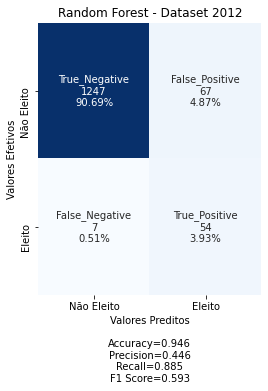

In [62]:
from sklearn.metrics import confusion_matrix
titulo = 'Random Forest - Dataset 2012'
y_teste = pred12_rf.RESULTADO
y_pred = pred12_rf.Label
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Não Eleito', 'Eleito']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories,figsize=(4,5),title = titulo)

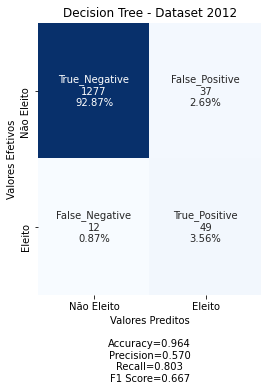

In [64]:
from sklearn.metrics import confusion_matrix
titulo = 'Decision Tree - Dataset 2012'
y_teste = pred12_dt.RESULTADO
y_pred = pred12_dt.Label
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Não Eleito', 'Eleito']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories,figsize=(4,5),title = titulo)

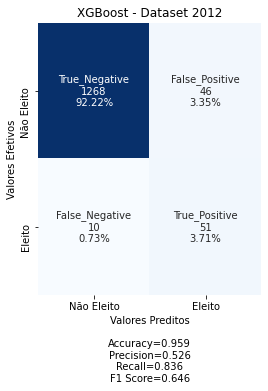

In [66]:
from sklearn.metrics import confusion_matrix
titulo = 'XGBoost - Dataset 2012'
y_teste = pred12_xg.RESULTADO
y_pred = pred12_xg.Label
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Não Eleito', 'Eleito']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories,figsize=(4,5),title = titulo)

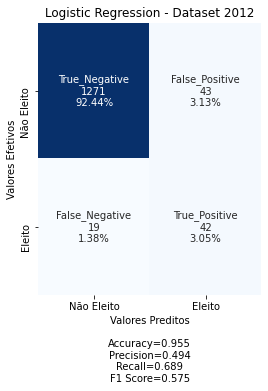

In [68]:
from sklearn.metrics import confusion_matrix
titulo = 'Logistic Regression - Dataset 2012'
y_teste = pred12_rl.RESULTADO
y_pred = pred12_rl.Label
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Não Eleito', 'Eleito']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories,figsize=(4,5),title = titulo)

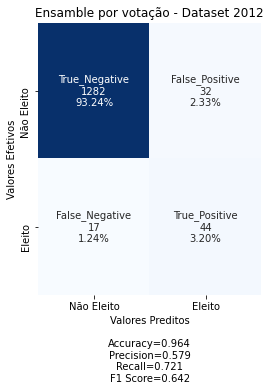

In [70]:
from sklearn.metrics import confusion_matrix
titulo = 'Ensamble por votação - Dataset 2012'
y_teste = pred12_b4s.RESULTADO
y_pred = pred12_b4s.Label
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Não Eleito', 'Eleito']
make_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories,figsize=(4,5),title = titulo)

In [39]:
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = True, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (4, 4), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [53]:
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=False,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Valores Efetivos')
        plt.xlabel('Valores Preditos' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [18]:
!mlflow ui

[2021-07-27 09:45:01 -0300] [8741] [INFO] Starting gunicorn 20.0.4
[2021-07-27 09:45:01 -0300] [8741] [INFO] Listening at: http://127.0.0.1:5000 (8741)
[2021-07-27 09:45:01 -0300] [8741] [INFO] Using worker: sync
[2021-07-27 09:45:01 -0300] [8744] [INFO] Booting worker with pid: 8744
^C
[2021-07-27 09:48:13 -0300] [8741] [INFO] Handling signal: int
[2021-07-27 09:48:13 -0300] [8744] [INFO] Worker exiting (pid: 8744)
